<a href="https://colab.research.google.com/github/MohamedAbdelAzeem/Lane-Detection/blob/main/Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython.core.display import HTML, Video
from moviepy.editor import VideoFileClip

from LaneLines import *

In [4]:
%cd drive/MyDrive/A_ImageProcessingProject

/content/drive/MyDrive/A_ImageProcessingProject


In [ ]:
rm -rf /root/.config/Google/DriveFS/<UNIQUE NUMERICAL ID>/content_cache


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing images

In [6]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [7]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [8]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

# Original Image

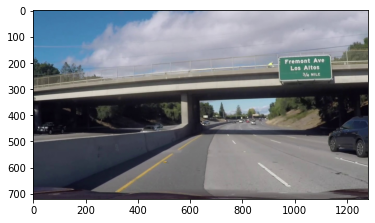

In [ ]:
 plt.imshow(images[1])

# Converting to HLS domain 


In [ ]:
def plot(img):
    # Converting to HLS
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # creating figure box 
    f = plt.figure(figsize=(24, 9))
    
    ax0 = f.add_subplot(2, 3, 1)
    ax0.imshow(hls)
    ax0.title.set_text('HLS image ')

    ax1 = f.add_subplot(2, 3, 2)
    ax1.imshow(hls[:,:,0])
    ax1.title.set_text('H channel ')


    ax2 = f.add_subplot(2, 3, 3)
    ax2.imshow(hls[:,:,1])
    ax2.title.set_text('L channel ')

    ax3 = f.add_subplot(2, 3, 4)
    ax3.imshow(hls[:,:,2])
    ax3.title.set_text('S channel ')

    ax4 = f.add_subplot(2, 3, 5)
    ax4.imshow(hsv[:,:,2])
    ax4.title.set_text('V channel ')

    plt.figure()
    

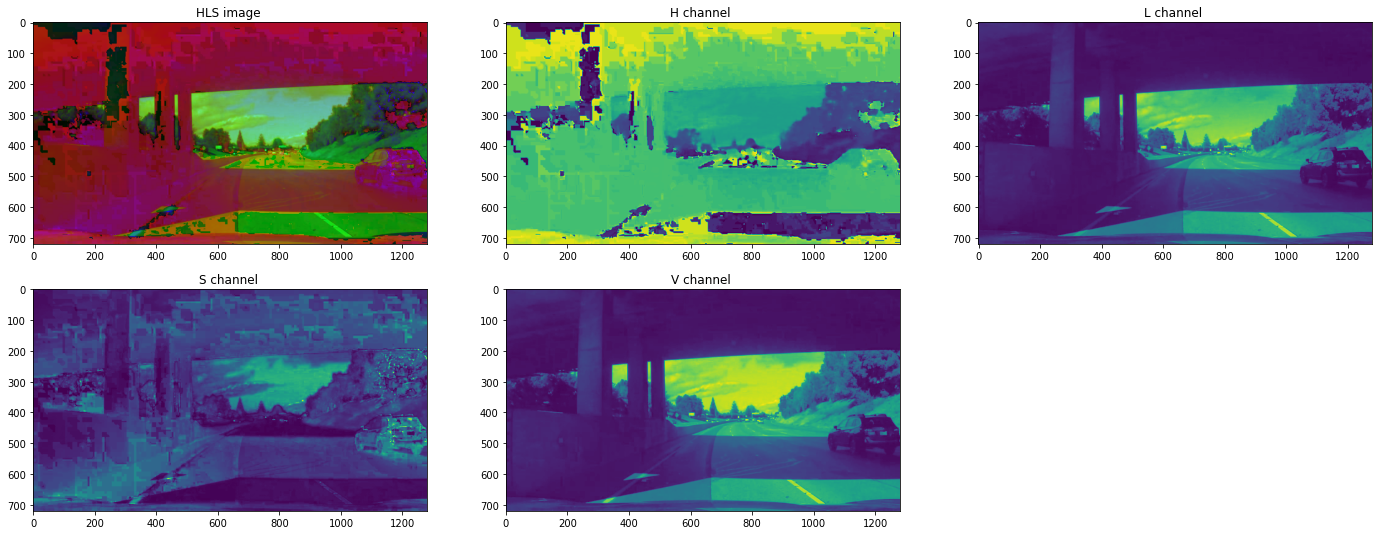

<Figure size 432x288 with 0 Axes>

In [ ]:
plot(images[2])

#Thresholding 
In thresholding, each pixel value is compared with the threshold value.

In [9]:
def threshold_rel(img, lo, hi):
    # minimum pixel in the image
    vmin = np.min(img)
    # maximum pixel in the image
    vmax = np.max(img)
    #adjusting low and hight threshold:
    #any pixel lower than  vlo will be zero 
    #any pixel higher than vhi will be 255
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi

    #compare the image with the threshold
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    #compare with the lo & hi directly 
    return np.uint8((img >= lo) & (img <= hi)) * 255

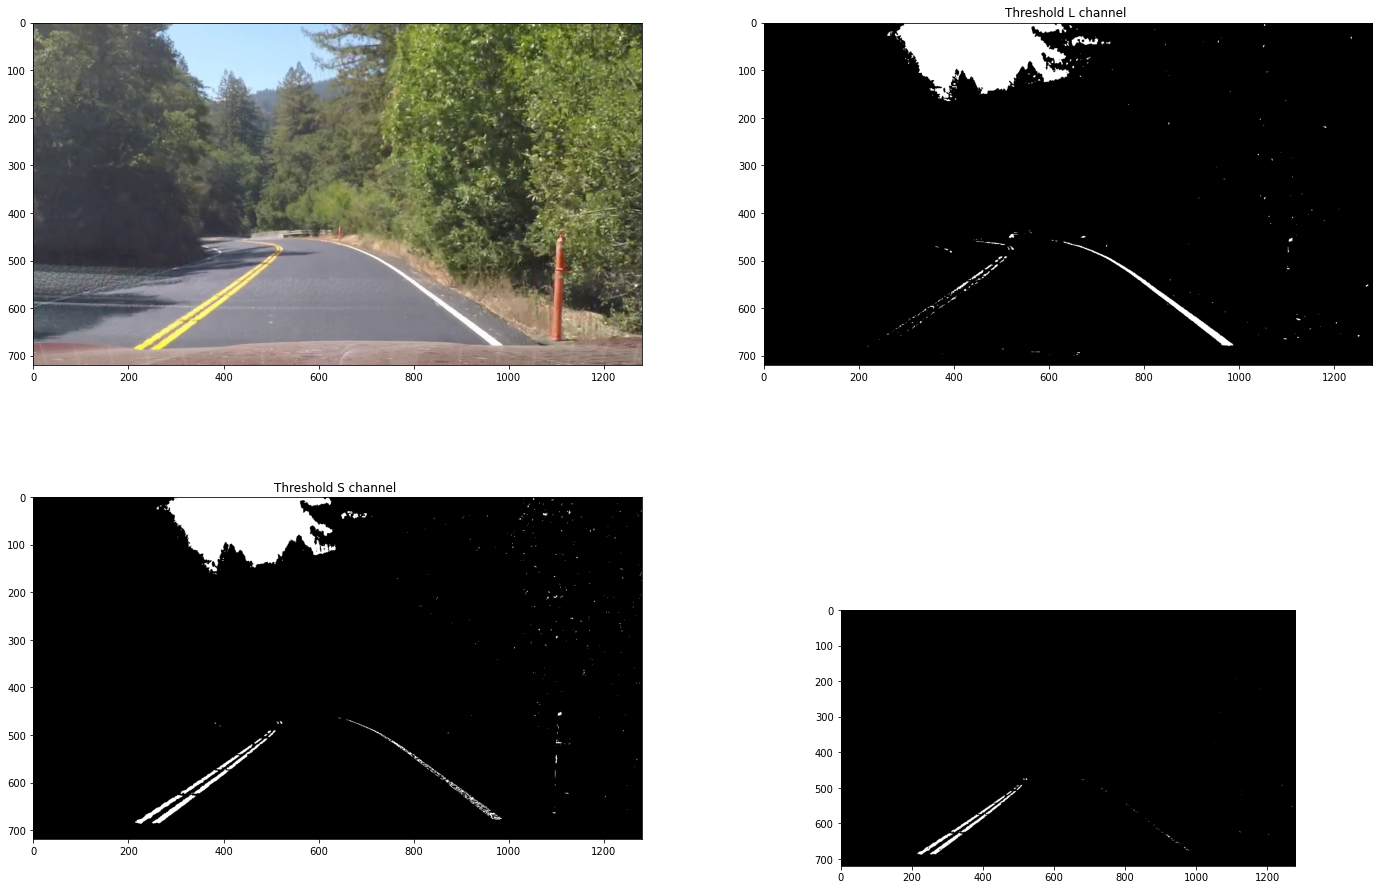

In [ ]:
#original image
f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(images2[1])


#convert to HLS
hls = cv2.cvtColor(images2[1], cv2.COLOR_RGB2HLS)
hsv = cv2.cvtColor(images2[1], cv2.COLOR_RGB2HSV)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

#apply threshold
thresh_Lchannel =  threshold_rel(l_channel, 0.8, 1.0)
thresh_Lchannel2 =  threshold_rel(s_channel, 0.8, 1.0)

#show images after threshold 
ax2 = f.add_subplot(2, 2, 2)
ax2.imshow(thresh_Lchannel, vmin=0, vmax=255, cmap='gray')
ax2.title.set_text('Threshold L channel ')

#show image 
ax3 = f.add_subplot(2, 2, 3)
ax3.imshow(thresh_Lchannel2, vmin=0, vmax=255, cmap='gray')
ax3.title.set_text('Threshold S channel ')


res = threshold_abs(h_channel, 20, 30)
res &= threshold_rel(s_channel, 0.8, 1.0)


ax4 = f.add_subplot(3 ,2, 6)
ax4.imshow(res, vmin=0, vmax=255, cmap='gray')



# PerspectiveTransformation

src (np.array): Coordinates of 4 source points

dst (np.array): Coordinates of 4 destination points

M (np.array): Matrix to transform image from front view to top view

M_inv (np.array): Matrix to transform image from top view to front view

In [10]:
def To_Birdeye(img):
    """Init PerspectiveTransformation."""
    src = np.float32([(550, 460),     # top-left
                          (150, 720),     # bottom-left
                          (1200, 720),    # bottom-right
                          (770, 460)])    # top-right
    dst = np.float32([(100, 0),
                          (100, 720),
                          (1100, 720),
                          (1100, 0)])

    img_size=(1280, 720)
    flags=cv2.INTER_LINEAR
    
    M = cv2.getPerspectiveTransform(src, dst)

    result_Image = cv2.warpPerspective(img, M, img_size, flags)

    return result_Image


def From_Birdeye(img):
  """ Take a top view image and transform it to front view """
  src = np.float32([(550, 460),     # top-left
                        (150, 720),     # bottom-left
                        (1200, 720),    # bottom-right
                        (770, 460)])    # top-right
  dst = np.float32([(100, 0),
                        (100, 720),
                        (1100, 720),
                        (1100, 0)])

  img_size=(1280, 720)
  flags=cv2.INTER_LINEAR
  
  M_inv = cv2.getPerspectiveTransform(dst, src)

  result_Image = cv2.warpPerspective(img, M_inv, img_size, flags=flags)

  return result_Image



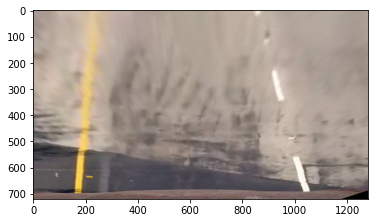

In [72]:
birdeyeImage = To_Birdeye(images1[4])
plt.imshow(birdeyeImage)

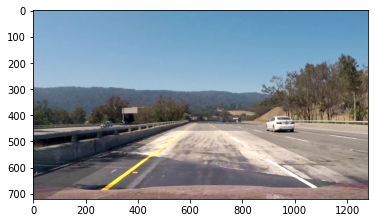

In [76]:
img4 = From_Birdeye(birdeyeImage)
out_img = cv2.addWeighted(images1[4], 1, img4, 0.3, 0)
plt.imshow(out_img)

# Applying Threshold on birdeye Image 
## Sperate left lane and right lane individually with different threshold  and OR them together

In [11]:
def Apply_Threshold_On_Bird_Image_Test(img):
  birdeyeImage = To_Birdeye(img)

  hls2 = cv2.cvtColor(birdeyeImage, cv2.COLOR_RGB2HLS)
  hsv2 = cv2.cvtColor(birdeyeImage, cv2.COLOR_RGB2HSV)
  h_channel2 = hls2[:,:,0]
  l_channel2 = hls2[:,:,1]
  s_channel2 = hls2[:,:,2]
  v_channel2 = hsv2[:,:,2]

  f = plt.figure(figsize=(24, 16))
  ax1 = f.add_subplot(3, 2, 1)
  ax1.imshow(birdeyeImage)

  ax0 = f.add_subplot(3, 2, 2)
  ax0.imshow(l_channel2 )


  right_lane = threshold_rel(l_channel2, 0.8, 1.0)

  ax2 = f.add_subplot(3, 2, 3)
  ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

  ax3 = f.add_subplot(3, 2, 4)
  left_lane = threshold_abs(h_channel2, 20, 30)
  left_lane &= threshold_rel(v_channel2, 0.7, 1.0)

  left_lane[:,550:] = 0

  ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

  img2 = left_lane | right_lane
  ax4 = f.add_subplot(3, 2, 5)
  ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

  return img2


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

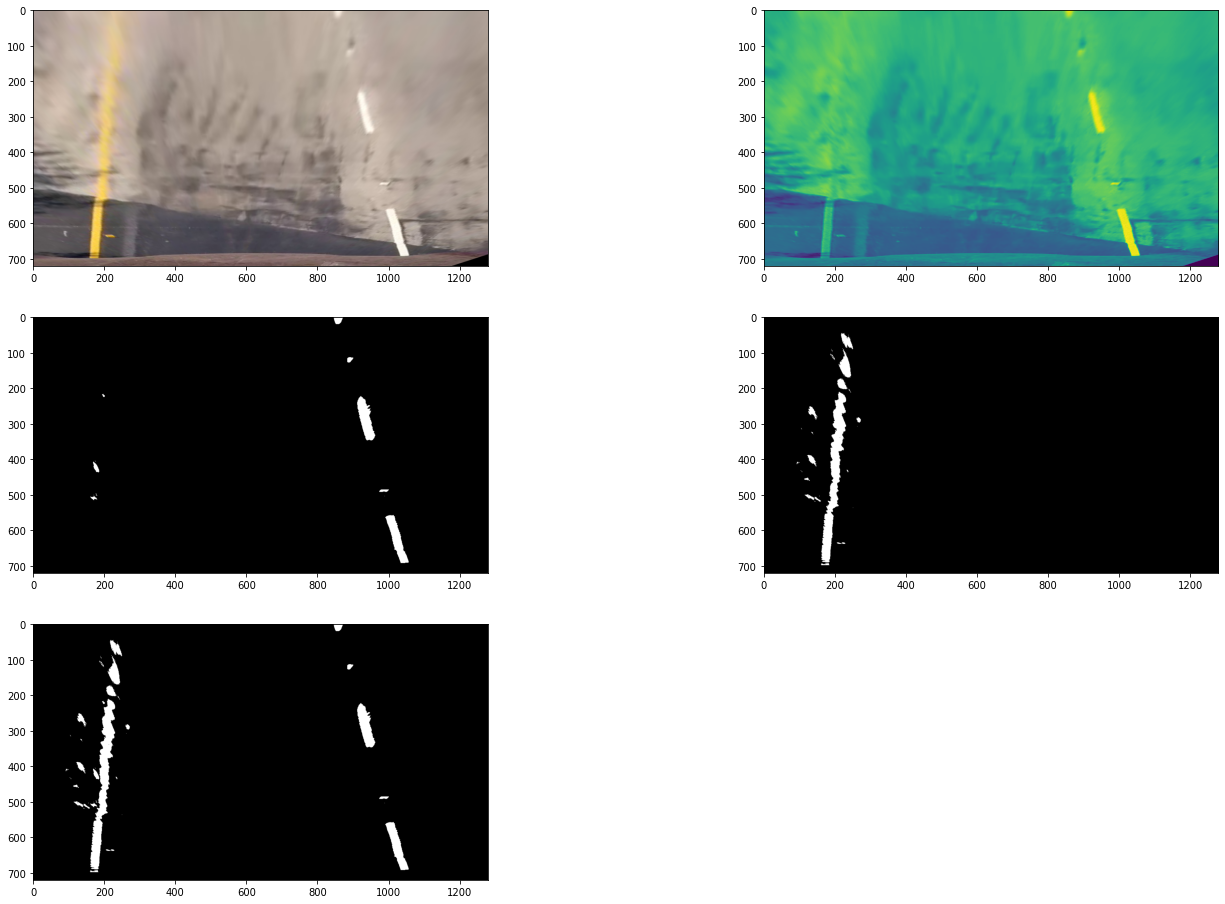

In [22]:
Apply_Threshold_On_Bird_Image_Test(images1[4])

#Detecting lane lines and drawing on bird eye image







In [76]:
import cv2
import numpy as np
import matplotlib.image as mpimg

def hist(img):
    bottom_half = img[img.shape[0]//2:,:]
    return np.sum(bottom_half, axis=0)

class LaneLines:
    """ Class containing information about detected lane lines.

    Attributes:
        left_fit (np.array): Coefficients of a polynomial that fit left lane line
        right_fit (np.array): Coefficients of a polynomial that fit right lane line
        parameters (dict): Dictionary containing all parameters needed for the pipeline
        debug (boolean): Flag for debug/normal mode
    """
    def __init__(self):
        """Init Lanelines.

        Parameters:
            left_fit (np.array): Coefficients of polynomial that fit left lane
            right_fit (np.array): Coefficients of polynomial that fit right lane
            binary (np.array): binary image
        """
        self.left_fit = None
        self.right_fit = None
        self.binary = None
        self.nonzero = None
        self.nonzerox = None
        self.nonzeroy = None
        self.clear_visibility = True
        self.dir = []
        self.left_curve_img = mpimg.imread('left_turn.png')
        self.right_curve_img = mpimg.imread('right_turn.png')
        self.keep_straight_img = mpimg.imread('straight.png')
        #contrast 
        self.left_curve_img = cv2.normalize(src=self.left_curve_img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        self.right_curve_img = cv2.normalize(src=self.right_curve_img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        self.keep_straight_img = cv2.normalize(src=self.keep_straight_img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

        self.WindowTopLeft = []
        self.WindowBottomRight = [] 

        self.OutImageWindow =None

       
        # HYPERPARAMETERS
        # Number of sliding windows
        self.nwindows = 9
        # Width of the the windows +/- margin
        self.margin = 100
        # Mininum number of pixels found to recenter window
        self.minpix = 50

    def forward(self, img):
        """Take a image and detect lane lines.

        Parameters:
            img (np.array): An binary image containing relevant pixels

        Returns:
            Image (np.array): An RGB image containing lane lines pixels and other details
        """
        self.extract_features(img)
        return self.fit_poly(img)

    def pixels_in_window(self, center, margin, height, img):
        """ Return all pixel that in a specific window

        Parameters:
            center (tuple): coordinate of the center of the window
            margin (int): half width of the window
            height (int): height of the window

        Returns:
            pixelx (np.array): x coordinates of pixels that lie inside the window
            pixely (np.array): y coordinates of pixels that lie inside the window
        """
                       #x                  #y
        topleft = (center[0]-margin, center[1]-height//2)   #point
        bottomright = (center[0]+margin, center[1]+height//2) #point

        self.WindowTopLeft.append(topleft)
        self.WindowBottomRight.append(bottomright)

        #check if topleft is outside in the left and bottomright is outside in the right
        condx = (topleft[0] <= self.nonzerox) & (self.nonzerox <= bottomright[0])
        condy = (topleft[1] <= self.nonzeroy) & (self.nonzeroy <= bottomright[1])
        return self.nonzerox[condx&condy], self.nonzeroy[condx&condy]

    def extract_features(self, img):
        """ Extract features from a binary image

        Parameters:
            img (np.array): A binary image
        """
        self.img = img
        # Height of of windows - based on nwindows and image shape
        self.window_height = np.int(img.shape[0]//self.nwindows)

        # Identify the x and y positions of all nonzero pixel in the image
        self.nonzero = img.nonzero()
        self.nonzerox = np.array(self.nonzero[1]) #Array containing all x coordinates of the lanes
        self.nonzeroy = np.array(self.nonzero[0]) #Array containing all y coordinates of the lanes

    def find_lane_pixels(self, img):
        """Find lane pixels from a binary warped image.

        Parameters:
            img (np.array): A binary warped image

        Returns:
            leftx (np.array): x coordinates of left lane pixels
            lefty (np.array): y coordinates of left lane pixels
            rightx (np.array): x coordinates of right lane pixels
            righty (np.array): y coordinates of right lane pixels
            out_img (np.array): A RGB image that use to display result later on.
        """
        assert(len(img.shape) == 2)

        # Create an output image to draw on and visualize the result
        out_img = np.dstack((img, img, img))

        histogram = hist(img)
        midpoint = histogram.shape[0]//2
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        # Current position to be update later for each window in nwindows
        leftx_current = leftx_base
        rightx_current = rightx_base
        y_current = img.shape[0] + self.window_height//2

        # Create empty lists to reveice left and right lane pixel
        leftx, lefty, rightx, righty = [], [], [], []

        # Step through the windows one by one
        for _ in range(self.nwindows):
            y_current -= self.window_height
            center_left = (leftx_current, y_current)
            center_right = (rightx_current, y_current)

            good_left_x, good_left_y = self.pixels_in_window(center_left, self.margin, self.window_height , out_img)
            good_right_x, good_right_y = self.pixels_in_window(center_right, self.margin, self.window_height, out_img)

            # Append these indices to the lists
            leftx.extend(good_left_x)
            lefty.extend(good_left_y)
            rightx.extend(good_right_x)
            righty.extend(good_right_y)


            if len(good_left_x) > self.minpix:
                leftx_current = np.int32(np.mean(good_left_x))
            if len(good_right_x) > self.minpix:
                rightx_current = np.int32(np.mean(good_right_x))

        return leftx, lefty, rightx, righty, out_img

    def fit_poly(self, img):
        """Find the lane line from an image and draw it.

        Parameters:
            img (np.array): a binary warped image

        Returns:
            out_img (np.array): a RGB image that have lane line drawn on that.
        """
        #find all pixels coordinates inside all windows
        leftx, lefty, rightx, righty, out_img = self.find_lane_pixels(img)

        if len(lefty) > 1500:
          #calculates the coof. of the ploynomial descibed by the lefty, leftx points
            self.left_fit = np.polyfit(lefty, leftx, 2)
        if len(righty) > 1500:
            self.right_fit = np.polyfit(righty, rightx, 2)

        # Generate x and y values for plotting
        maxy = img.shape[0] - 1
        miny = img.shape[0] // 3
        if len(lefty):
            maxy = max(maxy, np.max(lefty))
            miny = min(miny, np.min(lefty))

        if len(righty):
            maxy = max(maxy, np.max(righty))
            miny = min(miny, np.min(righty))

        ploty = np.linspace(miny, maxy, img.shape[0])
        # x      =          A        y^2      +      B            y    +    C
        left_fitx = self.left_fit[0]*ploty**2 + self.left_fit[1]*ploty + self.left_fit[2]
        right_fitx = self.right_fit[0]*ploty**2 + self.right_fit[1]*ploty + self.right_fit[2]


        self.OutImageWindow =  np.copy(out_img)
        # Visualization
        for i, y in enumerate(ploty):
            l = int(left_fitx[i])
            r = int(right_fitx[i])
            y = int(y)
            cv2.line(out_img, (l, y), (r, y), (0, 255, 0))

        
        for i in range(18):
          cv2.rectangle(self.OutImageWindow,(self.WindowTopLeft[i][0], self.WindowTopLeft[i][1]),( self.WindowBottomRight[i][0] , self.WindowBottomRight[i][1] ),(0,255,0), 2)

        self.WindowTopLeft.clear()
        self.WindowBottomRight.clear()

        lR, rR, pos = self.measure_curvature()

        return out_img

    def plot(self, out_img):
        np.set_printoptions(precision=6, suppress=True)
        lR, rR, pos = self.measure_curvature()

        value = None
        if abs(self.left_fit[0]) > abs(self.right_fit[0]):
            value = self.left_fit[0]
        else:
            value = self.right_fit[0]

        if abs(value) <= 0.00015:
            self.dir.append('F')
        elif value < 0:
            self.dir.append('L')
        else:
            self.dir.append('R')
        
        if len(self.dir) > 10:
            self.dir.pop(0)

        W = 320
        H = 500
        widget = np.copy(out_img[:H, :W])
        widget //= 2
        widget[0,:] = [0, 0, 255]
        widget[-1,:] = [0, 0, 255]
        widget[:,0] = [0, 0, 255]
        widget[:,-1] = [0, 0, 255]
        out_img[:H, :W] = widget

        direction = max(set(self.dir), key = self.dir.count)
        msg = "Keep Straight Ahead"
        curvature_msg = "Curvature = {:.0f} m".format(min(lR, rR))
        if direction == 'L':
            y, x = self.left_curve_img[:,:,3].nonzero()
            out_img[y, x-100+W//2] = self.left_curve_img[y, x, :3]
            msg = "Left Curve Ahead"
        if direction == 'R':
            y, x = self.right_curve_img[:,:,3].nonzero()
            out_img[y, x-100+W//2] = self.right_curve_img[y, x, :3]
            msg = "Right Curve Ahead"
        if direction == 'F':
            y, x = self.keep_straight_img[:,:,3].nonzero()
            out_img[y, x-100+W//2] = self.keep_straight_img[y, x, :3]

        cv2.putText(out_img, msg, org=(10, 240), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.66, color=(255, 255, 255), thickness=2)
        if direction in 'LR':
            cv2.putText(out_img, curvature_msg, org=(10, 280), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.67, color=(255, 255, 255), thickness=2)

        cv2.putText(
            out_img,
            "Good Lane Keeping",
            org=(5, 400),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.66,
            color=(0, 255, 0),
            thickness=2)

        cv2.putText(
            out_img,
            "Vehicle is {:.2f} m from center".format(pos),
            org=(5, 450),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.66,
            color=(255, 255, 255),
            thickness=2)

        return out_img

    def measure_curvature(self):
        ym = 30/720
        xm = 3.7/700

        left_fit = self.left_fit.copy()
        right_fit = self.right_fit.copy()
        y_eval = 700 * ym

        # Compute R_curve (radius of curvature)
        left_curveR =  ((1 + (2*left_fit[0] *y_eval + left_fit[1])**2)**1.5)  / np.absolute(2*left_fit[0])
        right_curveR = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])

        xl = np.dot(self.left_fit, [700**2, 700, 1])
        xr = np.dot(self.right_fit, [700**2, 700, 1])
        pos = (1280//2 - (xl+xr)//2)*xm
        return left_curveR, right_curveR, pos 


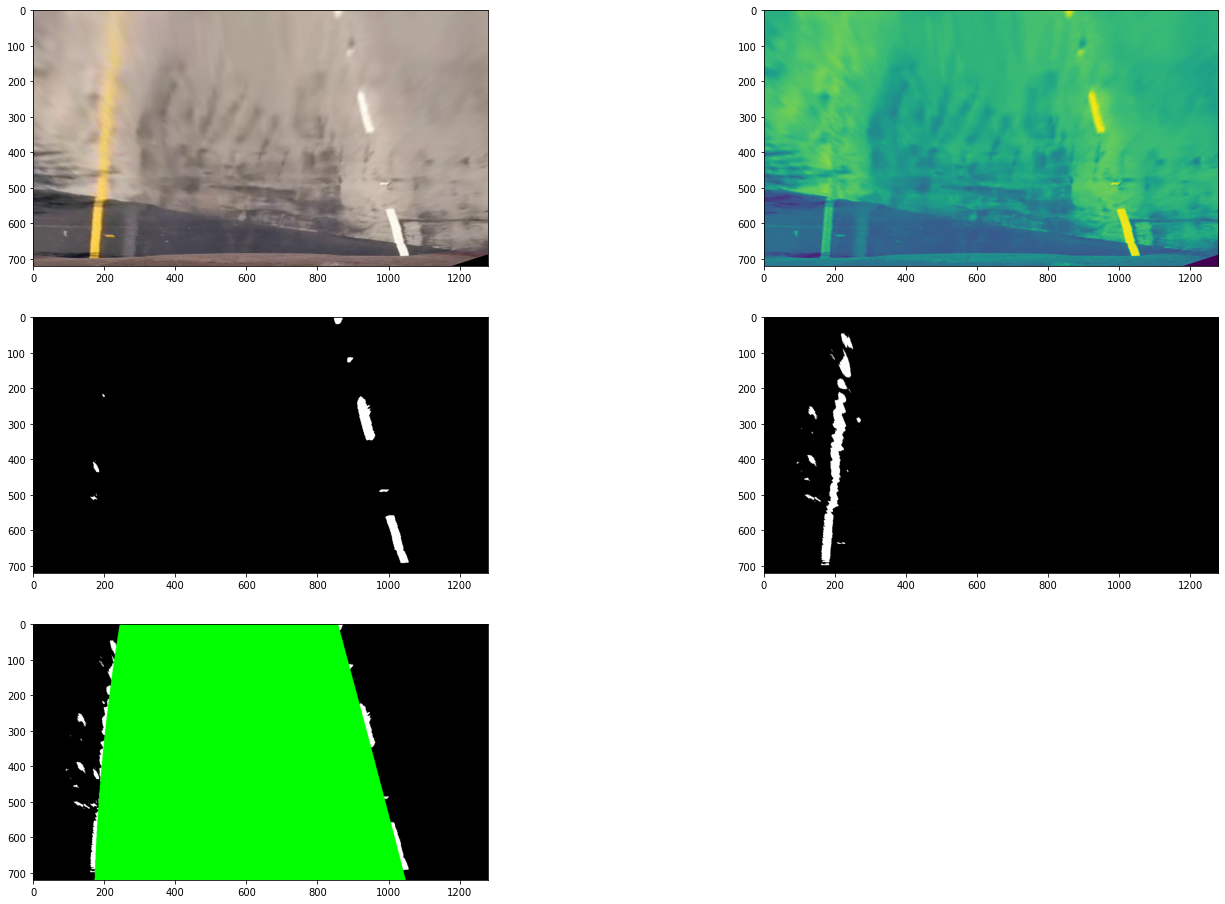

In [68]:
lanelines = LaneLines()
img3 = lanelines.forward(Apply_Threshold_On_Bird_Image_Test(images1[4]))

plt.imshow(lanelines.OutImageWindow)

plt.imshow(img3)

# Transforming image to original prespective

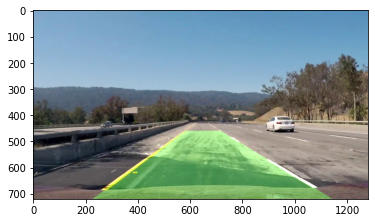

In [44]:
img4 = From_Birdeye(img3)
img = images1[4]
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

## Image Process Function to all previous steps

In [77]:

lanelines = LaneLines()
def apply_threshold(img):
  hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  h_channel = hls[:,:,0]
  l_channel = hls[:,:,1]
  s_channel = hls[:,:,2]
  v_channel = hsv[:,:,2]

  right_lane = threshold_rel(l_channel, 0.8, 1.0)
  right_lane[:,:750] = 0

  left_lane = threshold_abs(h_channel, 20, 30)
  left_lane &= threshold_rel(v_channel, 0.7, 1.0)
  left_lane[:,550:] = 0

  img2 = left_lane | right_lane

  return img2

def process_image(img):
    # step 1
    img1 = To_Birdeye(img)

    
    # step 2
    img2 = apply_threshold(img1)
    imgTh = apply_threshold(img)
        
    # step 3
    img3 = lanelines.forward(img2)
    

    # step 4
    img4 = From_Birdeye(img3)

    out_img = cv2.addWeighted(img, 1, img4, 1, 0)
    

################## Draw images ###########################################


   
    #percent by which the image is resized
    scale_percent = 70

    #calculate the  dimensions
    width = 320
    height = 180
  
    # dsize
    dsize = (width, height)

    OutImageWindows=  cv2.resize(img2, dsize)

    OutImagTH =  cv2.resize(imgTh, dsize)

    img3Small =  cv2.resize(img3, dsize)

    #resize images with windows
    lanelines.OutImageWindow =  cv2.resize(lanelines.OutImageWindow, dsize)

    out_img[180:360,960:1280,:]  = img3Small

    out_img[0:180,320:640,0]  = OutImagTH
    out_img[0:180,320:640,1]  =  OutImagTH
    out_img[0:180,320:640,2]  =  OutImagTH


    out_img[0:180,640:960,0]  =  OutImageWindows
    out_img[0:180,640:960,1]  =  OutImageWindows
    out_img[0:180,640:960,2]  =  OutImageWindows

    out_img[0:180,960:1280,:] =  lanelines.OutImageWindow

########################################################################

    #print curvature
    out_img = lanelines.plot(out_img)

    return out_img

In [78]:
clip = VideoFileClip("project_video.mp4")

In [ ]:
Video("harder_challenge_video.mp4")

In [79]:
out_clip = clip.fl_image(process_image)
out_clip.write_videofile("output_videos/tmp.mp4", audio=False)

[MoviePy] >>>> Building video output_videos/tmp.mp4
[MoviePy] Writing video output_videos/tmp.mp4


100%|█████████▉| 1260/1261 [03:03<00:00,  6.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/tmp.mp4 

